# 서울시 범죄 현황 데이터 분석

In [1]:
import pandas as pd 
import numpy as np 

## 01. 데이터 불러오기

In [6]:
crime_raw_data = pd.read_csv('../data/02_seoul_crime_2016.csv', encoding='euc-kr')
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0


## 02. 데이터 첫 번째 전처리 
- null, nan, NaN, None 
- 누락값 데이터 전처리

In [7]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      310 non-null    object 
 1   죄종      310 non-null    object 
 2   발생검거    310 non-null    object 
 3   건수      310 non-null    float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


In [8]:
crime_raw_data.tail()

,구분,죄종,발생검거,건수
65529,NaN,NaN,NaN,NaN
65530,NaN,NaN,NaN,NaN
65531,NaN,NaN,NaN,NaN
65532,NaN,NaN,NaN,NaN
65533,NaN,NaN,NaN,NaN


In [16]:
crime_raw_data['죄종'].unique()

array(['살인', '강도', '강간', '절도', '폭력'], dtype=object)

In [12]:
crime_raw_data[crime_raw_data['죄종'].isnull()]

,구분,죄종,발생검거,건수
310,NaN,NaN,NaN,NaN
311,NaN,NaN,NaN,NaN
312,NaN,NaN,NaN,NaN
313,NaN,NaN,NaN,NaN
314,NaN,NaN,NaN,NaN
...,...,...,...,...
65529,NaN,NaN,NaN,NaN
65530,NaN,NaN,NaN,NaN
65531,NaN,NaN,NaN,NaN
65532,NaN,NaN,NaN,NaN


In [14]:
crime_raw_data = crime_raw_data[crime_raw_data['죄종'].notnull()]

In [15]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      310 non-null    object 
 1   죄종      310 non-null    object 
 2   발생검거    310 non-null    object 
 3   건수      310 non-null    float64
dtypes: float64(1), object(3)
memory usage: 12.1+ KB


## 03. 데이터 전처리 두 번째
- 데이터 프레임 형태 변경
- 다중 컬럼 수정

In [20]:
crime_station = pd.pivot_table(
    data=crime_raw_data, 
    index='구분', 
    columns=['죄종', '발생검거']
    )

In [21]:
crime_station.head(1)

건수                                                             
죄종       강간           강도         살인           절도              폭력        
발생검거     검거     발생    검거    발생   검거   발생      검거      발생      검거      발생
구분                                                                      
강남    269.0  339.0  26.0  24.0  3.0  3.0  1129.0  2438.0  2096.0  2336.0

In [24]:
# 3줄의 컬럼 중, '건수' 컬럼 삭제
crime_station.columns = crime_station.columns.droplevel(0)

#### 발생한 검거한 강도 건수 상위 5개

In [32]:
crime_station['강도', '검거'].sort_values(ascending=False).head()

구분
강남     26.0
수서     16.0
중랑     14.0
영등포    14.0
구로     13.0
Name: (강도, 검거), dtype: float64

In [33]:
# 살인이 발생한 건수 상위 5개
crime_station['살인', '발생'].sort_values(ascending=False).head()

구분
영등포    13.0
송파      9.0
강서      9.0
구로      9.0
중랑      8.0
Name: (살인, 발생), dtype: float64

In [36]:
# 그러면, 강남경찰에서 발생한 절도 사건 건수
crime_station.loc['강남', ('절도', '발생')]

2438.0

In [38]:
'강도' + '검거'

'강도검거'

In [37]:
crime_station.head(1)

죄종       강간           강도         살인           절도              폭력        
발생검거     검거     발생    검거    발생   검거   발생      검거      발생      검거      발생
구분                                                                      
강남    269.0  339.0  26.0  24.0  3.0  3.0  1129.0  2438.0  2096.0  2336.0

In [41]:
tmp = 
crime_station.columns.get_level_values(0) + 
crime_station.columns.get_level_values(1)

In [43]:
# 다중 컬럼 
# 기존 컬럼 길이와 새로운 컬럼 길이가 같은지 확인
len(crime_station.columns), len(tmp)

(10, 10)

In [44]:
# 기존 컬럼을 새로운 컬럼으로 덮어 씌움
crime_station.columns = tmp

In [45]:
# 다중컬럼을 단일컬럼으로 정리
crime_station.head(1)

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0


In [46]:
# 컬럼 이름 변경

crime_station.rename(columns={
    '강간검거': '성범죄검거',
    '강간발생': '성범죄발생'}, inplace=True)

In [47]:
crime_station.head(1)

,성범죄검거,성범죄발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0


## 04. 데이터 세 번째 전처리
- 새로운 데이터 프레임 생성
- '구' 컬럼을 생성 후 인덱스 설정

---

In [51]:
dict_sample = {
    'Name': 'yongha',
    'Age': 18,
    'Class': 'ROS'
}

In [52]:
dict_sample

{'Name': 'yongha', 'Age': 18, 'Class': 'ROS'}

In [53]:
dict_sample.keys()

dict_keys(['Name', 'Age', 'Class'])

In [54]:
dict_sample.values()

dict_values(['yongha', 18, 'ROS'])

In [55]:
dict_sample.items()

dict_items([('Name', 'yongha'), ('Age', 18), ('Class', 'ROS')])

In [56]:
for key, val in dict_sample.items():
    print(key, val)

Name yongha
Age 18
Class ROS


In [57]:
len(crime_station.index)

31

In [62]:
real_gu = {
    "종로구":["종로", "혜화",], "중구":["남대문", "중부"],
    "용산구":["용산"], "성동구":["성동"],
    "광진구":["광진"], "동대문구":["동대문"],
    "중랑구":["중랑"], "성북구":["성북", "종암"],
    "강북구":["강북"], "도봉구":["도봉"],
    "노원구":["노원"], "은평구":["서부", "은평"],
    "서대문구":["서대문"], "마포구":["마포"],
    "양천구":["양천"], "강서구":["강서"],
    "구로구":["구로"], "금천구":["금천"],
    "영등포구":["영등포"], '동작구':['동작'],
    '관악구':['관악'], '서초구':['방배', '서초'],
    '강남구':['강남', '수서'], '송파구':['송파'],
    '강동구':['강동']
}

In [73]:
tmp_gu = [] 

for station in crime_station.index:
    for gu_name, station_name in real_gu.items():
        if station in station_name:
            tmp_gu.append(gu_name)

In [75]:
len(tmp_gu)

31

In [78]:
tmp_gu = [
    gu_name for station in crime_station.index 
    for gu_name, station_name in real_gu.items() 
    if station in station_name
    ]

In [80]:
crime_station['구'] = tmp_gu

In [85]:
# 구별 범죄 건수 집계 데이터 프레임
crime_gu = pd.pivot_table(data=crime_station, index='구', aggfunc=np.sum)

In [91]:
# 살인이 많이 일어난 구 상위 10개
crime_gu['살인발생'].sort_values(ascending=False).head(10)

구
영등포구    13.0
강서구      9.0
구로구      9.0
송파구      9.0
중랑구      8.0
동작구      8.0
강북구      7.0
관악구      6.0
종로구      6.0
금천구      6.0
Name: 살인발생, dtype: float64

In [94]:
# 절도 범죄가 가장 적게 일어난 구 5곳은 어디인가요?
crime_gu['절도발생'].sort_values().head()

구
도봉구     866.0
강북구    1222.0
동작구    1226.0
금천구    1264.0
성동구    1296.0
Name: 절도발생, dtype: float64

## 05. 데이터 네 번째 전처리
- 기존 데이터를 이용한 새로운 컬럼 생성
    - 검거율 컬럼 생성

In [95]:
crime_gu.head(1)

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,42.0,39.0,5.0,5.0,413.0,516.0,1918.0,3587.0,3527.0,4002.0


In [97]:
(crime_gu['절도검거'] / crime_gu['절도발생']) * 100

구
강남구     53.470867
강동구     51.425314
강북구     54.991817
강서구     54.815574
관악구     44.555397
광진구     40.098634
구로구     45.078534
금천구     51.740506
노원구     39.849219
도봉구     56.812933
동대문구    55.206186
동작구     45.187602
마포구     37.198259
서대문구    50.033267
서초구     50.204082
성동구     69.135802
성북구     49.319728
송파구     41.211168
양천구     43.920884
영등포구    40.153780
용산구     40.228341
은평구     53.421369
종로구     39.587629
중구      42.511628
중랑구     62.211709
dtype: float64

In [109]:
arrest_col = ['강도검거', '살인검거', '성범죄검거', '절도검거', '폭력검거']
occur_col = ['강도발생', '살인발생', '성범죄발생', '절도발생', '폭력발생']
arrest_rate = ['강도검거율', '살인검거율', '성범죄검거율', '절도검거율', '폭력검거율']

In [110]:
crime_gu[arrest_rate] = np.round((crime_gu[arrest_col].div(crime_gu[occur_col].values)) * 100, 2)

In [111]:
crime_gu.head()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,42.0,39.0,5.0,5.0,413.0,516.0,1918.0,3587.0,3527.0,4002.0,107.69,100.00,80.04,53.47,88.13
강동구,13.0,14.0,5.0,4.0,152.0,160.0,902.0,1754.0,2201.0,2530.0,92.86,125.00,95.00,51.43,87.00
강북구,4.0,5.0,6.0,7.0,159.0,217.0,672.0,1222.0,2482.0,2778.0,80.00,85.71,73.27,54.99,89.34
강서구,10.0,10.0,10.0,9.0,239.0,275.0,1070.0,1952.0,2768.0,3204.0,100.00,111.11,86.91,54.82,86.39
관악구,10.0,12.0,7.0,6.0,264.0,322.0,937.0,2103.0,2707.0,3235.0,83.33,116.67,81.99,44.56,83.68


In [115]:
print('강남구 강도검거 건수: ', crime_gu.loc['강남구', '강도검거'])
print('강남구 강도발생 건수: ', crime_gu.loc['강남구', '강도발생'])

강남구 강도검거 건수:  42.0
강남구 강도발생 건수:  39.0


In [114]:
(crime_gu.loc['강남구', '강도검거'] / crime_gu.loc['강남구', '강도발생']) * 100

107.6923076923077

In [119]:
# 100이 넘는 값은 100으로 수정
crime_gu[crime_gu[arrest_rate] > 100] = 100

In [121]:
# 컬럼 이름 수정
crime_gu.rename(columns={
    '강도발생': '강도', '살인발생': '살인',
    '성범죄발생': '성범죄', '절도발생': '절도', '폭력발생': '폭력'
}, inplace=True)

In [124]:
# '검거' 라는 이름이 들어간 컬럼 삭제
crime_gu.drop(arrest_col, axis=1, inplace=True)

In [125]:
crime_gu.head(1)

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,39.0,5.0,516.0,3587.0,4002.0,100.0,100.0,80.04,53.47,88.13


## 06. 데이터 다섯 번째 전처리
- 데이터 정규화(Normalization)
- 데이터를 0~1 사이값으로 변환

In [126]:
import matplotlib.pyplot as plt 
import koreanize_matplotlib

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

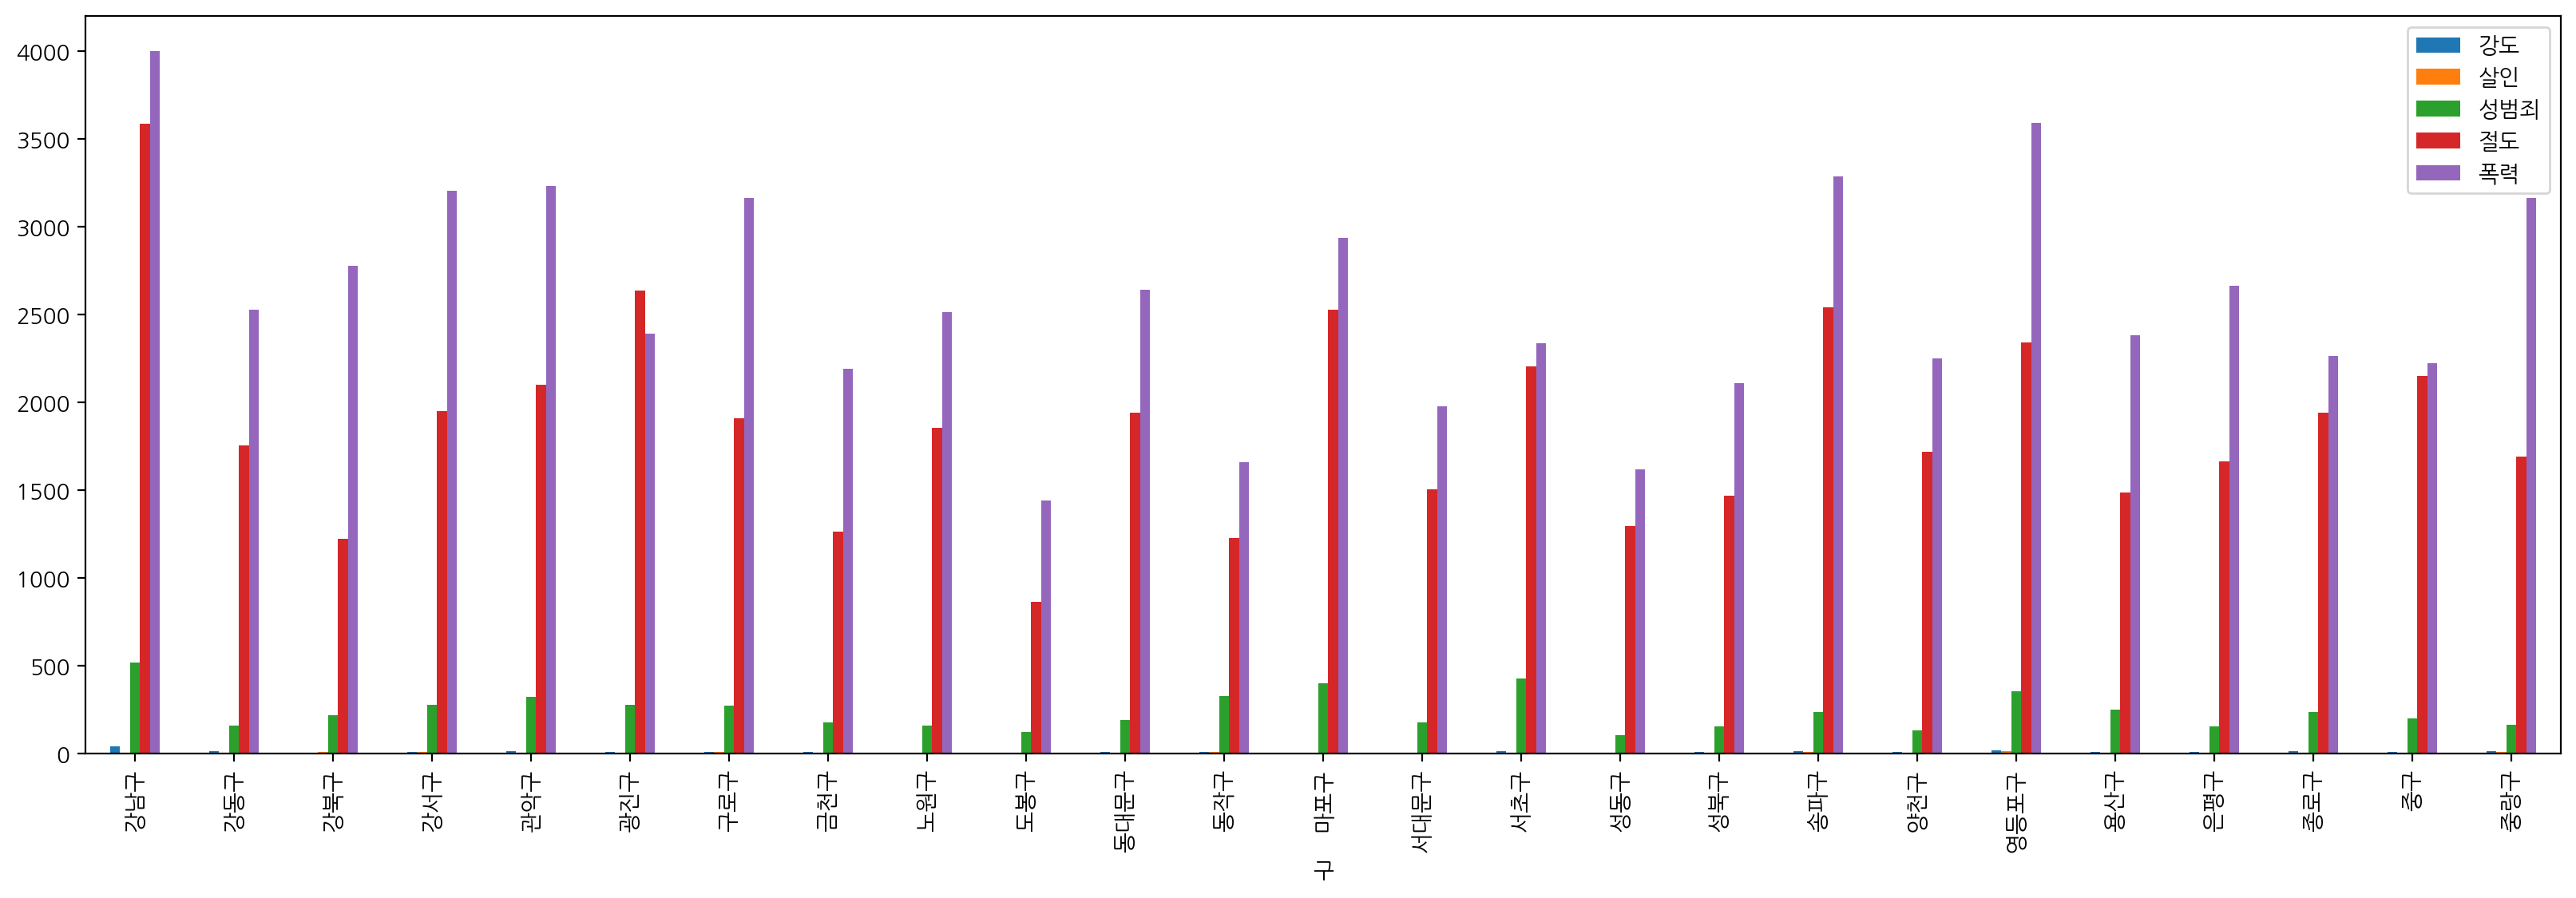

In [131]:
crime_gu[crime_gu.columns[:5]].plot(kind='bar', figsize=(20, 6));

In [135]:
crime_gu.loc['강남구', '강도'] / crime_gu['강도'].max()

1.0

In [139]:
crime_gu.loc['종로구', '강도'] / crime_gu['강도'].max()

0.3076923076923077

In [142]:
crime_gu[crime_gu.columns[:5]].max()

강도       39.0
살인       13.0
성범죄     516.0
절도     3587.0
폭력     4002.0
dtype: float64

In [144]:
# 정규화 작업
crime_gu_norm = crime_gu[crime_gu.columns[:5]] / crime_gu[crime_gu.columns[:5]].max()

In [146]:
occur_col = ['강도', '살인', '성범죄', '절도', '폭력']

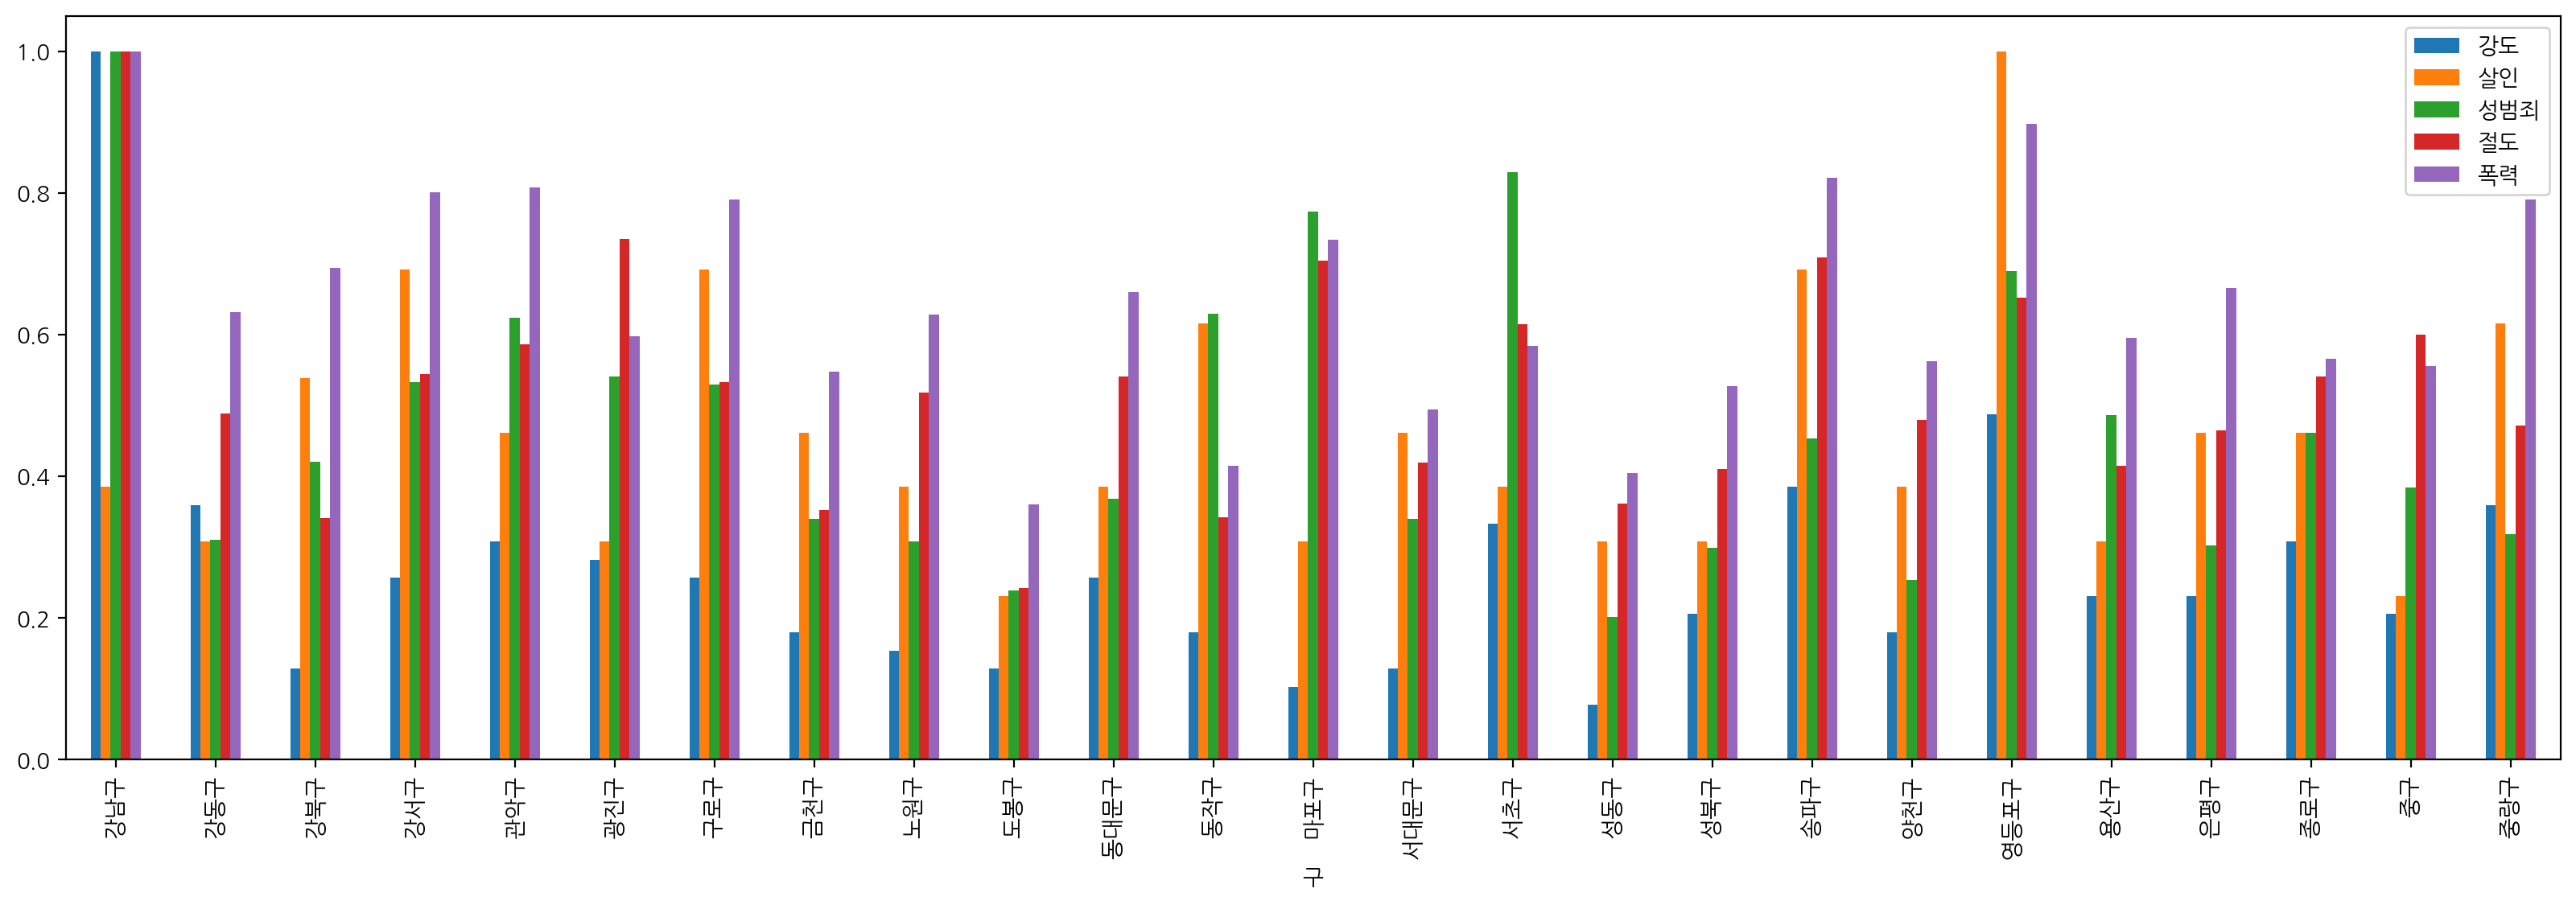

In [148]:
crime_gu_norm[occur_col].plot(kind='bar', figsize=(20, 6));

In [150]:
crime_gu_norm[arrest_rate] = crime_gu[arrest_rate]
crime_gu_norm.head(1)

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,1.0,0.384615,1.0,1.0,1.0,100.0,100.0,80.04,53.47,88.13


## 07. 데이터 여섯 번째 전처리
- 범죄, 검거 평균 컬럼 생성

In [ ]:
crime_gu_norm['범죄평균'] = 

#### 1. 강남구에서 일어난 5대 범죄 선택

In [153]:
crime_gu_norm[occur_col].loc['강남구']

강도     1.000000
살인     0.384615
성범죄    1.000000
절도     1.000000
폭력     1.000000
Name: 강남구, dtype: float64

#### 2. 강남구에서 일어난 5대 범죄 총합

In [155]:
crime_gu_norm[occur_col].loc['강남구'].sum()

4.384615384615385

#### 3. 5로 나눠줍니다

In [156]:
crime_gu_norm[occur_col].loc['강남구'].sum() / 5

0.876923076923077

In [174]:
mean_test_df = crime_gu_norm[occur_col].head()

In [175]:
np.mean(mean_test_df, axis=0)

강도     0.410256
살인     0.476923
성범죄    0.577519
절도     0.592027
폭력     0.787056
dtype: float64

In [177]:
mean_test_df['강도'].sum() / 5

0.41025641025641024

In [179]:
mean_test_df['강도']

구
강남구    1.000000
강동구    0.358974
강북구    0.128205
강서구    0.256410
관악구    0.307692
Name: 강도, dtype: float64

In [180]:
np.mean(crime_gu_norm[occur_col], axis=1)  # numpy axis=1 행, axis=0 열

구
강남구     0.876923
강동구     0.419583
강북구     0.424407
강서구     0.565290
관악구     0.557578
광진구     0.492604
구로구     0.560174
금천구     0.376107
노원구     0.398598
도봉구     0.239769
동대문구    0.442051
동작구     0.436310
마포구     0.524477
서대문구    0.368331
서초구     0.549267
성동구     0.270404
성북구     0.349564
송파구     0.612240
양천구     0.371886
영등포구    0.745508
용산구     0.407142
은평구     0.424951
종로구     0.467356
중구      0.394995
중랑구     0.510844
dtype: float64

In [181]:
crime_gu_norm['범죄평균'] = np.mean(crime_gu_norm[occur_col], axis=1)

In [182]:
crime_gu_norm['검거평균'] = np.mean(crime_gu_norm[arrest_rate], axis=1)

In [183]:
crime_gu_norm.head(1)

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균,검거평균
구,,,,,,,,,,,,
강남구,1.0,0.384615,1.0,1.0,1.0,100.0,100.0,80.04,53.47,88.13,0.876923,84.328


In [186]:
# 범죄 평균치로 정렬했을 때, 서울에서 범죄가 많이 일어나는 구는?
crime_gu_norm['범죄평균'].sort_values(ascending=False).head()

구
강남구     0.876923
영등포구    0.745508
송파구     0.612240
강서구     0.565290
구로구     0.560174
Name: 범죄평균, dtype: float64

In [187]:
# 검거 평균치로 정렬했을 때, 서울시에서 범죄 검거율이 높은 구는 어디?
crime_gu_norm['검거평균'].sort_values(ascending=False).head()

구
도봉구     89.204
성동구     86.222
동대문구    85.668
강서구     85.624
중랑구     85.376
Name: 검거평균, dtype: float64

In [189]:
# 데이터 저장 
crime_gu_norm.to_csv('../data/crime_gu_norm_2016.csv', encoding='utf-8')

In [192]:
# 데이터 불러오기 
new_df = pd.read_csv('../data/crime_gu_norm_2016.csv', index_col=0)
new_df.head(2)

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균,검거평균
구,,,,,,,,,,,,
강남구,1.000000,0.384615,1.000000,1.000000,1.000000,100.00,100.0,80.04,53.47,88.13,0.876923,84.328
강동구,0.358974,0.307692,0.310078,0.488988,0.632184,92.86,100.0,95.00,51.43,87.00,0.419583,85.258
